<a href="https://colab.research.google.com/github/Feronia26/SKRIPSI/blob/main/%5BSkripsi%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import PIL
import tensorflow as tf
import torch
import torchvision.models as models
from keras.models import Model,Sequential
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Normal = '/content/drive/MyDrive/Feronia_6162001165/Data/Normal'
Skoliosis = '/content/drive/MyDrive/Feronia_6162001165/Data/Skoliosis'

In [ ]:
normal_files = os.listdir(Normal)
jumlah_normal_files = len(normal_files)
print("Jumlah file di direktori Normal:", jumlah_normal_files)

Jumlah file di direktori Normal: 71


In [ ]:
skoliosis_files = os.listdir(Skoliosis)
jumlah_skoliosis_files = len(skoliosis_files)
print("Jumlah file di direktori Skoliosis:", jumlah_skoliosis_files)

Jumlah file di direktori Skoliosis: 227


In [ ]:
data = []
label = []

In [ ]:
for file_name in normal_files:
    image_path = os.path.join(Normal, file_name)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode='rgb', target_size=(224, 224))
    image = np.array(image)
    data.append(image)
    label.append(0)


In [ ]:
for file_name in skoliosis_files:
    image_path = os.path.join(Skoliosis, file_name)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode='rgb', target_size=(224, 224))
    image = np.array(image)
    data.append(image)
    label.append(1)

In [ ]:
data = np.array(data)
label = np.array(label)

In [ ]:
print("Shape of data:", data.shape)
print("Shape of label:", label.shape)

Shape of data: (298, 224, 224, 3)
Shape of label: (298,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, ytrain, ytest = train_test_split(data, label, test_size=0.3, random_state=42)

In [ ]:
print("Shape of data:", X_train.shape)
print("Shape of label:", X_test.shape)
print("Shape of data:", ytrain.shape)
print("Shape of label:", ytest.shape)

Shape of data: (208, 224, 224, 3)
Shape of label: (90, 224, 224, 3)
Shape of data: (208,)
Shape of label: (90,)


In [ ]:
X_train = X_train /255
X_test = X_test /255

In [ ]:
base_resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_resnet_model.trainable = True
base_resnet_model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = base_resnet_model(inputs)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Dropout(0.3)(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
resnet_model = keras.Model(inputs, outputs)
resnet_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 128)         2359424   
                                                                 
 max_pooling2d (MaxPooling2  (None, 2, 2, 128)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 2, 2, 128)         0         
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                             

In [ ]:
initial_learning_rate = 0.00001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True
)

resnet_model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=['accuracy']
)

In [ ]:
hist= resnet_model.fit(X_train, ytrain, epochs=10, batch_size=12, validation_data= (X_test, ytest), shuffle = True, verbose=1)
hist_df = pd.DataFrame(hist.history)

Epoch 1/10
18/18 [==============================] - 195s 10s/step - loss: 0.8283 - accuracy: 0.6442 - val_loss: 0.7829 - val_accuracy: 0.2444
Epoch 2/10
18/18 [==============================] - 168s 9s/step - loss: 0.2882 - accuracy: 0.8846 - val_loss: 1.0303 - val_accuracy: 0.2444
Epoch 3/10
18/18 [==============================] - 170s 10s/step - loss: 0.1735 - accuracy: 0.9375 - val_loss: 0.6300 - val_accuracy: 0.7444
Epoch 4/10
18/18 [==============================] - 168s 9s/step - loss: 0.1238 - accuracy: 0.9567 - val_loss: 0.5824 - val_accuracy: 0.7556
Epoch 5/10
18/18 [==============================] - 163s 9s/step - loss: 0.0949 - accuracy: 0.9615 - val_loss: 0.5788 - val_accuracy: 0.7556
Epoch 6/10
18/18 [==============================] - 162s 9s/step - loss: 0.0709 - accuracy: 0.9808 - val_loss: 0.6003 - val_accuracy: 0.7556
Epoch 7/10
18/18 [==============================] - 166s 9s/step - loss: 0.0321 - accuracy: 0.9952 - val_loss: 0.6085 - val_accuracy: 0.7556
Epoch 8/10


In [ ]:
model_name = 'ResNet50'
hist_df = pd.DataFrame(hist.history)
hist_csv_file = '/content/drive/MyDrive/Feronia_6162001165/History60/'+model_name+'.csv'

with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

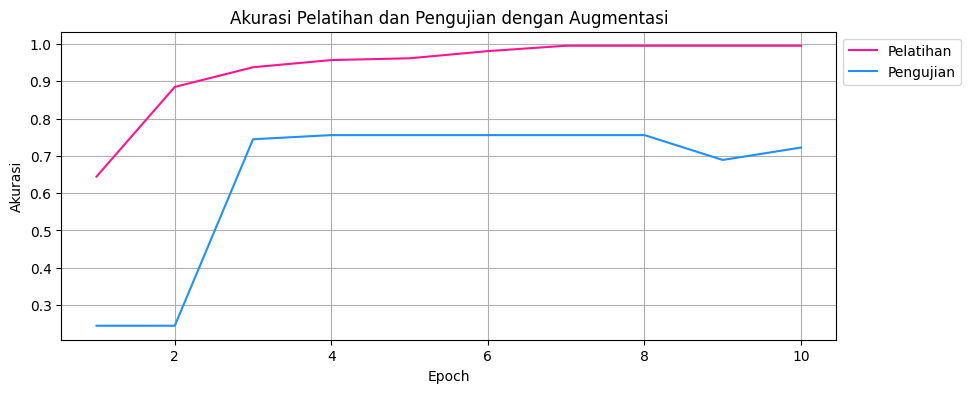

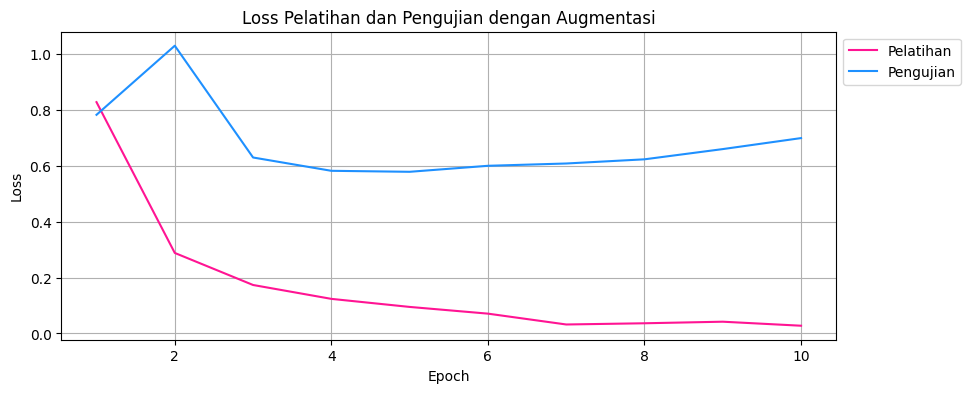

In [ ]:
# Membuat plot akurasi model ResNet50
plt.figure(figsize=(10, 4))
plt.plot(range(1, len(hist.history['accuracy']) + 1), hist.history['accuracy'], color='deeppink')
plt.plot(range(1, len(hist.history['val_accuracy']) + 1), hist.history['val_accuracy'], color='dodgerblue')
plt.title('Akurasi Pelatihan dan Pengujian dengan Augmentasi')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.grid(True)

# Place the legend outside the plot
plt.legend(['Pelatihan', 'Pengujian'], loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

print()

plt.figure(figsize=(10, 4))
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'], color='deeppink')
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'], color='dodgerblue')
plt.title('Loss Pelatihan dan Pengujian dengan Augmentasi')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)

# Place the legend outside the plot
plt.legend(['Pelatihan', 'Pengujian'], loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [ ]:
labels = ['Normal', 'Skoliosis']
predicted_vals = resnet_model.predict(X_test, steps = X_test.shape[0])

90/90 [==============================] - 23s 224ms/step


In [ ]:
import pandas as pd

# Assuming hist_df is already defined
print("Training Accuracy:", hist_df['accuracy'].iloc[-1])
print("Validation Accuracy:", hist_df['val_accuracy'].iloc[-1])

print("Training Loss:", hist_df['loss'].iloc[-1])
print("Validation Loss:", hist_df['val_loss'].iloc[-1])

Training Accuracy: 0.995192289352417
Validation Accuracy: 0.7222222089767456
Training Loss: 0.02762831375002861
Validation Loss: 0.6995201110839844


In [ ]:
from sklearn.metrics import (classification_report, confusion_matrix, average_precision_score,
    precision_recall_curve, roc_auc_score, roc_curve, f1_score)
predicted_classes = np.round(predicted_vals)

conf_matrix = confusion_matrix(ytest, predicted_classes)

print("Confusion Matrix:")
print(conf_matrix)

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

accuracy = (TP + TN) / float(TP + TN + FP + FN)

precision = TP / float(TP + FP)

recall = TP / float(TP + FN)

f1 = 2 * (precision * recall) / (precision + recall)

specificity = TN / (TN + FP)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1-score:", f1)
print("Specificity:", specificity)

Confusion Matrix:
[[ 0 22]
 [ 3 65]]
Accuracy: 0.7222222222222222
Precision: 0.7471264367816092
Recall (Sensitivity): 0.9558823529411765
F1-score: 0.8387096774193548
Specificity: 0.0


In [ ]:
loss = hist.history['loss'][-1]
print("Final loss of the model:", loss)

Final loss of the model: 0.02762831375002861


In [ ]:
model_json = resnet_model.to_json()
with open('/content/drive/MyDrive/Feronia_6162001165/History60/'+ model_name + '.json', "w") as json_file:
    json_file.write(model_json)
resnet_model.save_weights('/content/drive/MyDrive/Feronia_6162001165/History60/'+ model_name + '.h5')
print("Saved model to disk")

Saved model to disk
